<a href="https://colab.research.google.com/github/yanhoyos/Clasificacion-Senales/blob/main/PatternRecognitionOnEmotional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

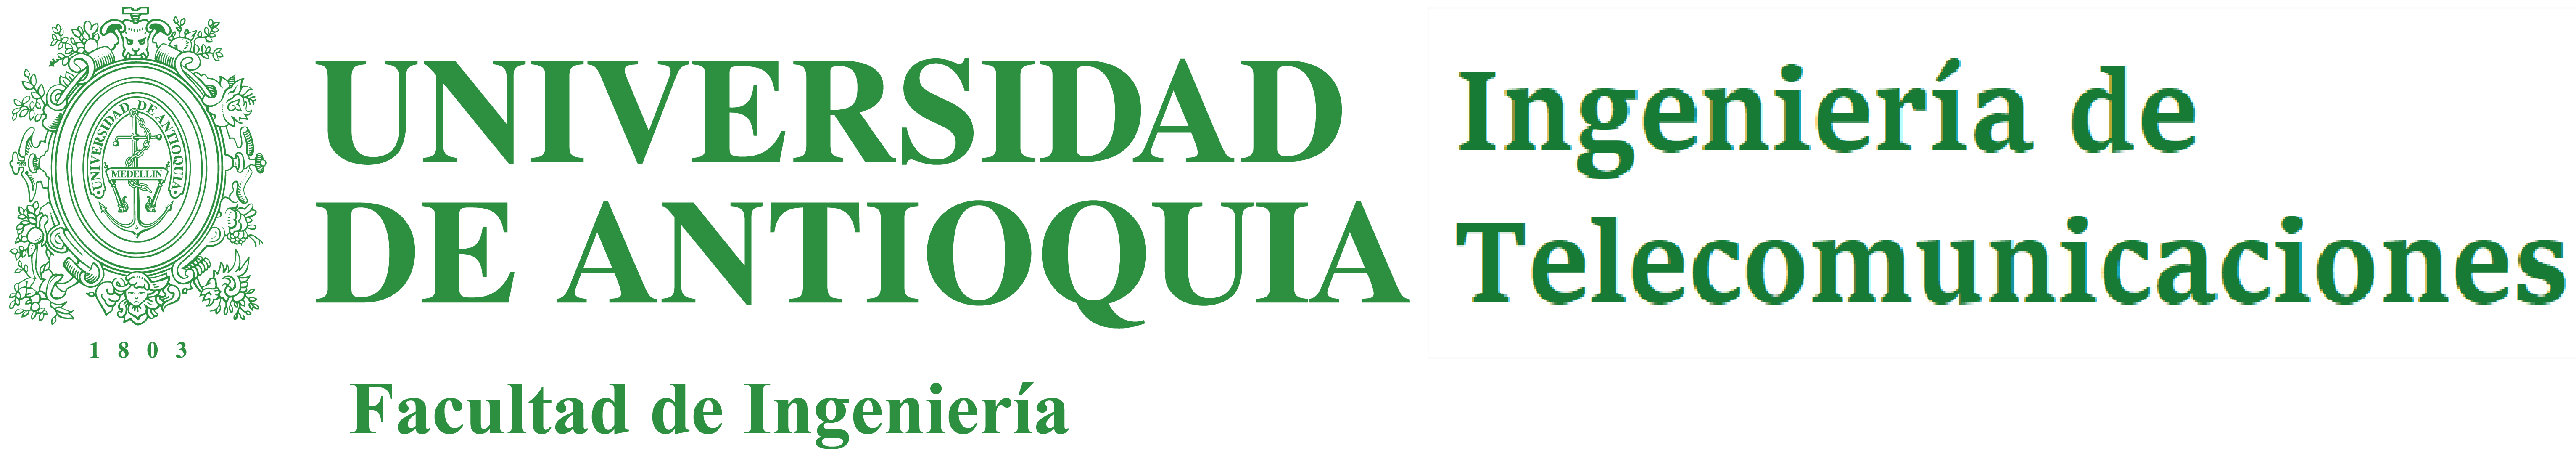

# Universidad de Antiquia
# Procesamiento de Señales para Machine Learning
## Facultad de Ingeniería
### Agosto 2022

## Laboratorio de PCA + Clasificación con modelo Naive Bayes Gaussiano y Regresión Logística

### Integrantes:
- Camilo Hernández Ruiz
- Yan Sebastián Hoyos

# 1. Creación de los datasets

## 1.1 Creación de sets de entrenamiento y prueba
Primero se importa el dataset desde _sklearn_ y se separa en sets de entrenamiento y prueba.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/TS3 provisional/Laboratorio 5: reconocimiento de patrones en datasets emocionales'
print('Mostrando elementos de la carpeta:')
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1Ecv7phK4PYbZbtG_GR8hU9oLVbXCyxrH/TS3 provisional/Laboratorio 5: reconocimiento de patrones en datasets emocionales
Mostrando elementos de la carpeta:
 affectiveDB_2.mat  'Características biométricas.npy'
 affectiveDB_3.mat  'Etiquetas Tipo de Movimiento.npy'
 affetiveDB_1.mat    PatternRecognitionOnEmotional.ipynb


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

X = np.load('Características biométricas.npy')
labels = np.load('Etiquetas Tipo de Movimiento.npy')


In [ ]:
display(labels)
y = labels.copy()
y[np.where(labels=='Negativo')] = 0
y[np.where(labels=='Neutral')] = 1
y[np.where(labels=='Positivo')] = 2
y = np.asarray(y, dtype=np.uint8)
display(y)

array(['Negativo', 'Positivo', 'Positivo', 'Positivo', 'Neutral',
       'Neutral', 'Positivo', 'Neutral', 'Neutral', 'Neutral', 'Positivo',
       'Neutral', 'Neutral', 'Neutral', 'Negativo', 'Neutral', 'Negativo',
       'Positivo', 'Negativo', 'Neutral', 'Neutral', 'Positivo',
       'Neutral', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Neutral', 'Positivo', 'Neutral', 'Neutral',
       'Negativo', 'Negativo', 'Negativo', 'Neutral', 'Positivo',
       'Neutral', 'Positivo', 'Neutral'], dtype='<U8')

array([0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1], dtype=uint8)

In [ ]:
# Escalamiento
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
#scaler = StandardScaler().fit(X)
#print(scaler.var_)
#print(scaler.mean_)

Regresión Logística con X_scaled

In [ ]:
acc_train, acc_test = [], []
Nreps = 100
for it in range(Nreps):
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=.9)

  LRmodel = LogisticRegression(C = 0.05) # C: inverso de regularización
  LRmodel.fit(X_train, y_train)

  y_est_train = LRmodel.predict(X_train)
  y_est_test = LRmodel.predict(X_test)

  acc_train.append(accuracy_score(y_train, y_est_train))
  acc_test.append(accuracy_score(y_test, y_est_test))

print(f'Acc train:  {np.mean(acc_train)} +/- {np.std(acc_train)}')
print(f'Acc test:  {np.mean(acc_test)} +/- {np.std(acc_test)}')

Acc train:  1.0 +/- 0.0
Acc test:  0.4775 +/- 0.23209642392764265


## 1.2 Análisis PCA
Para entender mejor la importancia de las características, se ha realizado una transformación PCA.

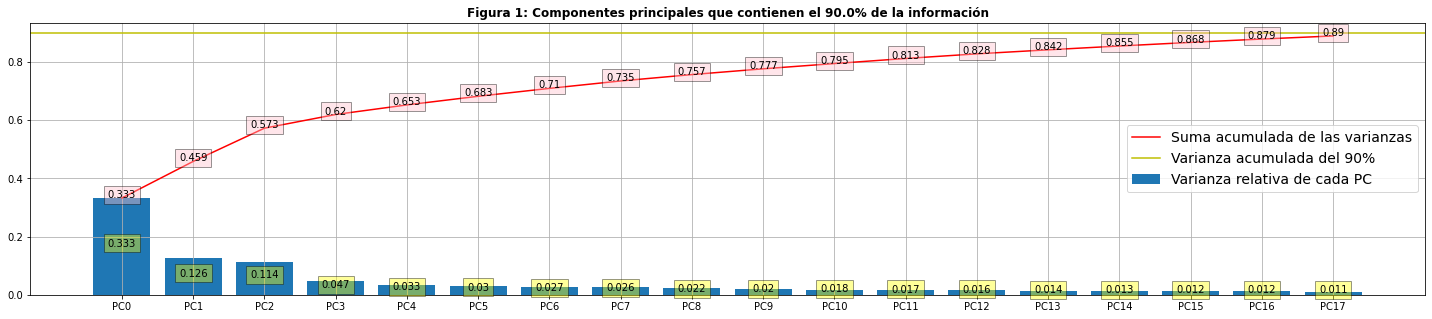

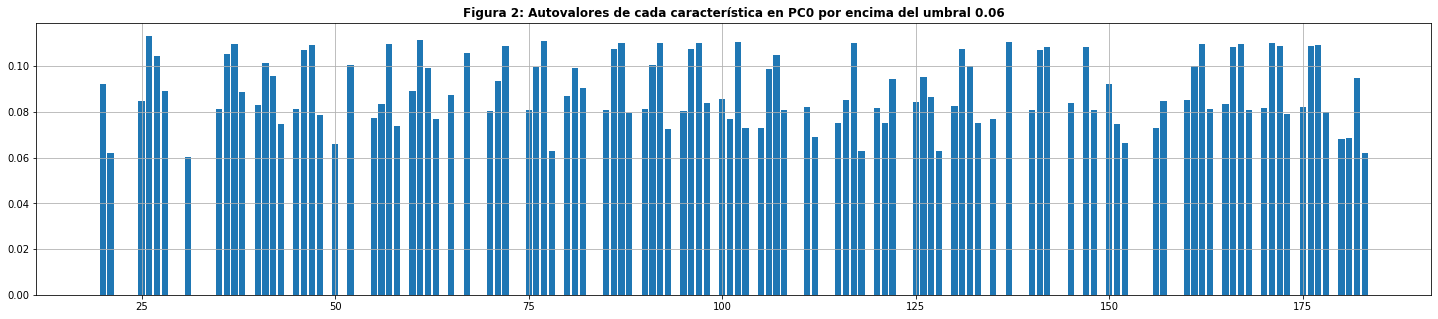

In [ ]:
from sklearn.decomposition import PCA

def addtext(x,y,razon,box_color):
    for i in range(len(x)):
        plt.text(i,y[i]/razon,y[i],ha='center',
                  bbox = dict(facecolor=box_color, alpha=0.4))

pca = PCA(n_components=18).fit(X_scaled)
X_pca = pca.transform(X_scaled)
columnsPCAs = [f'PC{i}' for i in range(X_pca.shape[1])]
fig_size=(25,5)
umbral_varianza = 0.9
# Gráfica de la varianza relativa de los PC
plt.figure(figsize=fig_size)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'r',label='Suma acumulada de las varianzas')
plt.bar(columnsPCAs, abs(pca.explained_variance_ratio_),label='Varianza relativa de cada PC')
plt.axhline(umbral_varianza,c='y',label='Varianza acumulada del 90%')
addtext(columnsPCAs, abs(pca.explained_variance_ratio_.round(3)) , 2, 'yellow')
addtext(columnsPCAs, abs(np.cumsum(pca.explained_variance_ratio_).round(3)) , 1, 'pink')
plt.legend(loc='center right', fontsize=14)
plt.title(f'Figura 1: Componentes principales que contienen el {umbral_varianza*100}% de la información', fontweight="bold")
plt.grid(True)
plt.show()

umbral_caracteristicas = 0.06
selected_features = pca.components_[0][np.where(pca.components_[0]>umbral_caracteristicas)]
features = np.where(pca.components_[0]>umbral_caracteristicas)[0]
# Gráfica de los coeficientes de importancia de cada feature en PC0
plt.figure(figsize=fig_size)
plt.bar(features,selected_features)
#plt.ylim(0,0.18)
#addtext(range(X.shape[1]),abs(pca.components_[0]).round(3), 2, 'yellow')
plt.title(f'Figura 2: Autovalores de cada característica en PC0 por encima del umbral {umbral_caracteristicas}',fontweight="bold")
plt.grid(True)
plt.show()

Regresión logistica con PCA, 17 componentes.

In [ ]:
acc_train, acc_test = [], []
Nreps = 100
for it in range(Nreps):
  X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=.9)

  LRmodel = LogisticRegression(C = 0.05) # C: inverso de regularización
  LRmodel.fit(X_train, y_train)

  y_est_train = LRmodel.predict(X_train)
  y_est_test = LRmodel.predict(X_test)

  acc_train.append(accuracy_score(y_train, y_est_train))
  acc_test.append(accuracy_score(y_test, y_est_test))

print(f'Acc train:  {np.mean(acc_train)} +/- {np.std(acc_train)}')
print(f'Acc test:  {np.mean(acc_test)} +/- {np.std(acc_test)}')

Acc train:  0.9124999999999999 +/- 0.03836452032481425
Acc test:  0.4575 +/- 0.24252577182641846
